<a href="https://colab.research.google.com/github/RaneemF/CREDIT-CARD_FRAUD_DETECTION/blob/main/Credit%20card%20fraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('/content/sample_data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,39702.000000,...,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000,39701.000000
mean,25502.432497,-0.213932,0.051942,0.713780,0.189431,-0.231083,0.100915,-0.112981,0.041731,0.214179,...,-0.029662,-0.112320,-0.040265,0.007226,0.136322,0.023181,0.008097,0.004171,87.445979,0.002620
std,12626.308343,1.831757,1.548373,1.506728,1.399784,1.379431,1.304722,1.244260,1.222742,1.225147,...,0.750969,0.638109,0.551644,0.593281,0.435481,0.504830,0.385255,0.298453,234.567447,0.051115
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,14678.500000,-0.967117,-0.525207,0.233522,-0.717668,-0.835646,-0.638647,-0.597725,-0.152448,-0.555904,...,-0.236834,-0.534709,-0.178626,-0.325662,-0.128065,-0.330371,-0.063315,-0.006938,7.300000,0.000000
50%,30598.500000,-0.233669,0.101393,0.818163,0.185015,-0.267851,-0.158696,-0.073409,0.048385,0.091864,...,-0.077298,-0.086811,-0.051646,0.060796,0.176097,-0.063305,0.008394,0.021454,23.430000,0.000000
75%,35625.000000,1.160708,0.743741,1.447844,1.071347,0.297049,0.487010,0.433877,0.314947,0.930712,...,0.100244,0.299013,0.076971,0.399378,0.421048,0.304110,0.085116,0.075965,79.000000,0.000000
max,39929.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


<Axes: xlabel='Amount', ylabel='Class'>

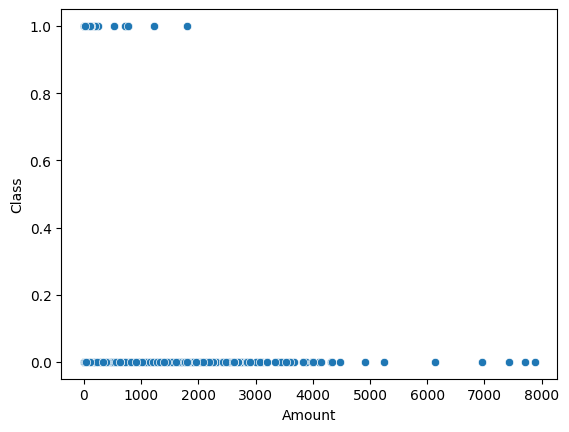

In [ ]:
sns.scatterplot(x=df['Amount'], y=df['Class'])

In [ ]:
df['Class'].value_counts()

0.0    39597
1.0      104
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

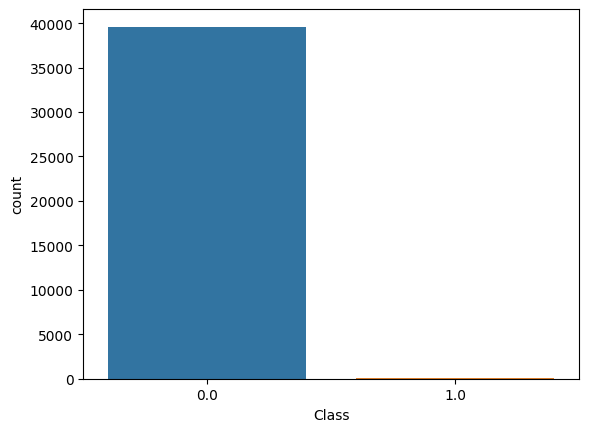

In [ ]:
sns.countplot(x=df['Class'])

In [ ]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

non_fraud = non_fraud.sample(frac=1)

non_fraud = non_fraud[:492]

new_df = pd.concat([non_fraud,fraud])
new_df = new_df.sample(frac=1)

In [ ]:
new_df['Class'].value_counts()

0.0    492
1.0    104
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

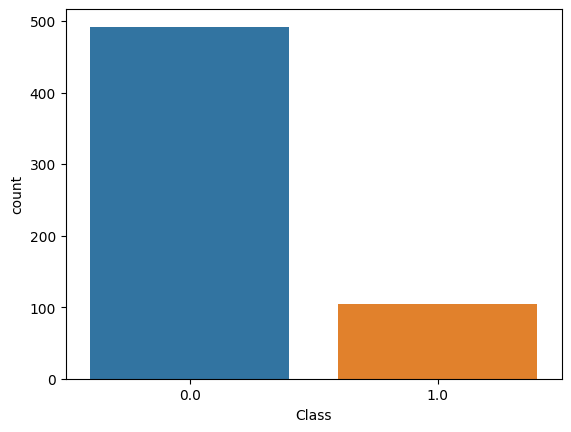

In [ ]:
sns.countplot(x=new_df['Class'])

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()

df_small = df[['Time','Amount']]
df_small = pd.DataFrame(rbs.fit_transform(df_small))

df_small.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_small],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,-1.460793,1.759972
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-1.460793,-0.289261
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,-1.460745,4.954393
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,-1.460745,1.395676
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-1.460697,0.649372


In [ ]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


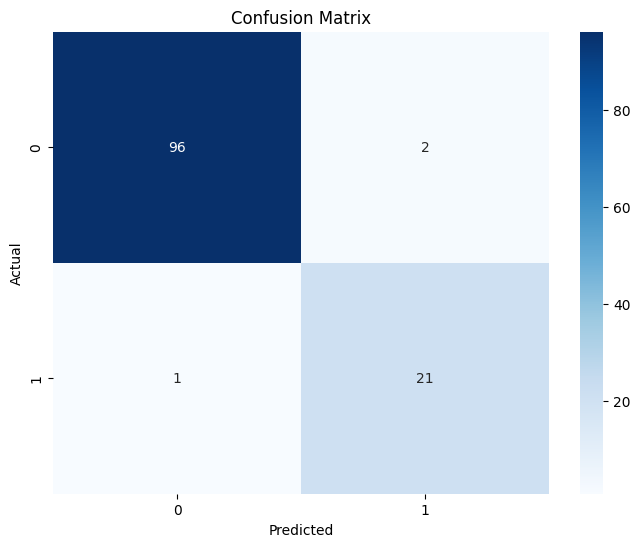

accuracy is -->  97.5
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        98
         1.0       0.91      0.95      0.93        22

    accuracy                           0.97       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.98      0.97      0.98       120



In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

# Classification report
report = classification_report(y_test, pred)
print(report)


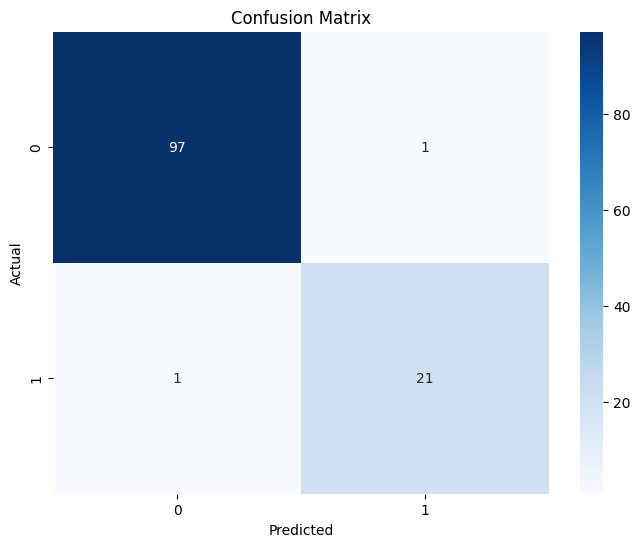

accuracy is -->  98.33
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        98
         1.0       0.95      0.95      0.95        22

    accuracy                           0.98       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.98      0.98       120

accuracy is -->  98.33


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
# Classification report
report = classification_report(y_test, pred)
print(report)
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
# Visualization of Decision Tree (optional)
# Uncomment the following lines if you want to visualize the Decision Tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15, 10))
# plot_tree(dt, filled=True)
# plt.show()


accuracy is -->  86.67


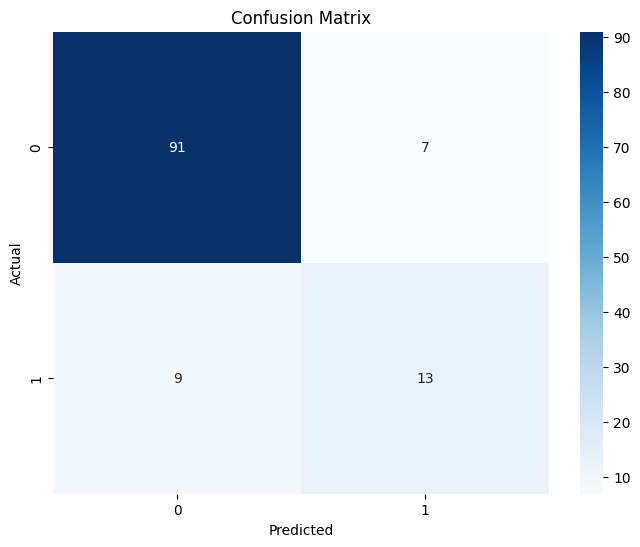

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        98
         1.0       0.65      0.59      0.62        22

    accuracy                           0.87       120
   macro avg       0.78      0.76      0.77       120
weighted avg       0.86      0.87      0.86       120



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
plt.show()

# Classification report
report = classification_report(y_test, pred)
print(report)


accuracy is -->  99.17


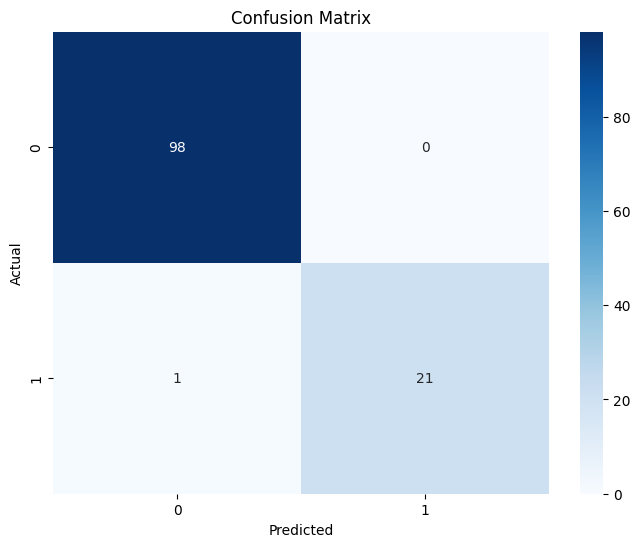

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        98
         1.0       1.00      0.95      0.98        22

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
plt.show()

# Classification report
report = classification_report(y_test, pred)
print(report)
